In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
from termcolor import colored
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import confusion_matrix

data = pd.read_csv('cardio_train.csv',sep=';')

c:\Users\iaram\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\iaram\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\iaram\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
from termcolor import colored
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import confusion_matrix

data = pd.read_csv('cardio_train.csv',sep=';')

#### Descrição dos dados:
O conjunto de dados de doenças cardiovasculares é composto por 70.000 registros de pacientes de 1 a 107 anos, sendo 34.979 homens e 45.241 mulheres. O conjunto de dados contém 11 recursos, 10 variáveis de entrada e 1 variável de saída. O objetivo é prever a presença ou ausência de doenças cardiovasculares (CVD) usando os dados disponíveis no momento da consulta médica.

Existem 3 tipos de dados nesse dataset
<li> Objective: factual information;
<li> Examination: results of medical examination;
<li> Subjective: information given by the patient.

Colunas:
<li> Age | Objective Feature | age | int (days)
<li> Height | Objective Feature | height | int (cm) |
<li> Weight | Objective Feature | weight | float (kg) |
<li> Gender | Objective Feature | gender | categorical code |
<li> Systolic blood pressure | Examination Feature | ap_hi | int |
<li> Diastolic blood pressure | Examination Feature | ap_lo | int |
<li> Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
<li> Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
<li> Smoking | Subjective Feature | smoke | binary |
<li> Alcohol intake | Subjective Feature | alco | binary |
<li> Physical activity | Subjective Feature | active | binary |
<li> Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [4]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
data.isna().sum() #0 indicates no missing values in the dataset

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
data.shape

(70000, 13)

In [7]:
data['age'] = data['age'] / 365

data['IMC'] = data['weight'] / (data['height']/100) ** 2

data['ap_hi'] = abs(data['ap_hi'])
data['ap_lo'] = abs(data['ap_lo'])

data['age'] = data['age'].astype(int)

In [8]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,128.841429,96.632414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513
std,28851.302323,6.766774,0.476838,8.210126,14.395757,153.991223,188.471505,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511
min,0.000000,29.000000,1.000000,55.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


In [9]:
data = data[~((data.ap_hi < 60) | (data.ap_hi > 309) | (data.ap_lo < 30) | (data.ap_lo > 190) | (data['ap_hi'] <= data['ap_lo']))]
data = data[~((data['weight'] < 30) | (data['height'] > 220))]
data = data[~((data['IMC'] < 12) | (data['IMC'] > 45))]
data.shape

(68100, 14)

Em uma leitura típica da pressão arterial, a pressão sistólica (ap_hi) representa a pressão máxima exercida nas artérias quando o coração se contrai, enquanto a pressão diastólica (ap_lo) representa a pressão mínima quando o coração está em repouso entre os batimentos. Normalmente, a pressão sistólica deve ser maior que a pressão diastólica.

A condição data['ap_hi'] < data['ap_lo'] verifica se a pressão sistólica (ap_hi) é menor que a diastólica (ap_lo). Esta condição é incluída para identificar casos em que os valores de pressão arterial registrados são potencialmente errôneos ou inconsistentes com o padrão fisiológico esperado.

Em uma medida de pressão arterial válida, a pressão sistólica deve ser maior ou igual à pressão diastólica. Se esta condição for atendida, sugere que os valores da pressão arterial podem ter sido registrados incorretamente ou houve algum erro no processo de medição.

Ao incluir a condição data['ap_hi'] < data['ap_lo'] na expressão de filtragem, você pode identificar e potencialmente remover linhas do DataFrame onde a pressão sistólica registrada é menor que a pressão diastólica, pois é incomum e improvável cenário.

In [10]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
count,68100.000000,68100.000000,68100.000000,68100.000000,68100.000000,68100.000000,68100.000000,68100.000000,68100.000000,68100.000000,68100.000000,68100.000000,68100.000000,68100.000000
mean,49979.201527,52.825301,1.350220,164.472746,73.735520,126.580705,81.256799,1.362555,1.223759,0.088223,0.053333,0.803451,0.493275,27.282760
std,28845.904129,6.770425,0.477042,7.831331,13.549744,16.625914,9.432803,0.677269,0.569446,0.283621,0.224699,0.397391,0.499958,4.855352
min,0.000000,29.000000,1.000000,120.000000,30.000000,60.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.254473
25%,25005.250000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,50023.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.296567
75%,74870.750000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.091432
max,99999.000000,64.000000,2.000000,207.000000,149.000000,240.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,44.997166


In [11]:
data['cardio'].value_counts()

0    34508
1    33592
Name: cardio, dtype: int64

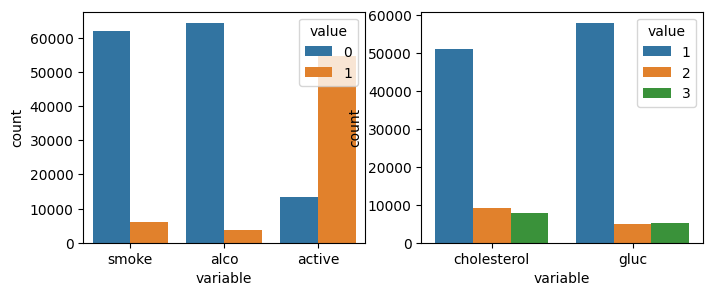

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

df_categorical_1 = data.loc[:,['smoke', 'alco', 'active']]
p1 = sns.countplot(x="variable", hue="value",data = pd.melt(df_categorical_1), ax=axes[0]);

df_categorical_2 = data.loc[:,['cholesterol', 'gluc']]
p2 = sns.countplot(x="variable", hue="value",data = pd.melt(df_categorical_2), ax=axes[1]);


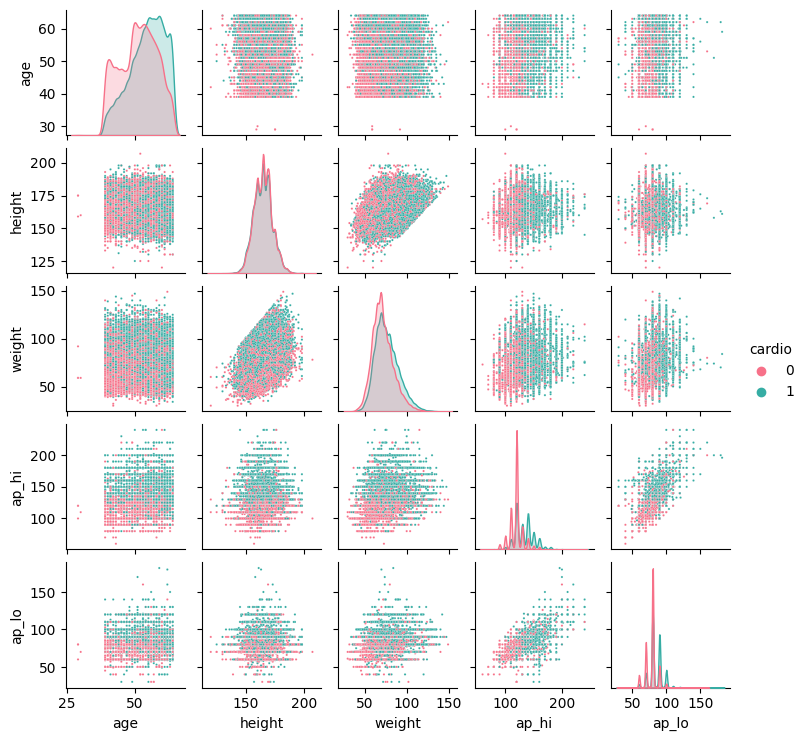

In [12]:
sns.pairplot(data, hue='cardio', vars=['age', 'height', 'weight', 'ap_hi', 'ap_lo'], palette='husl', height=1.5,aspect=1, plot_kws={ 's': 2.5 })
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

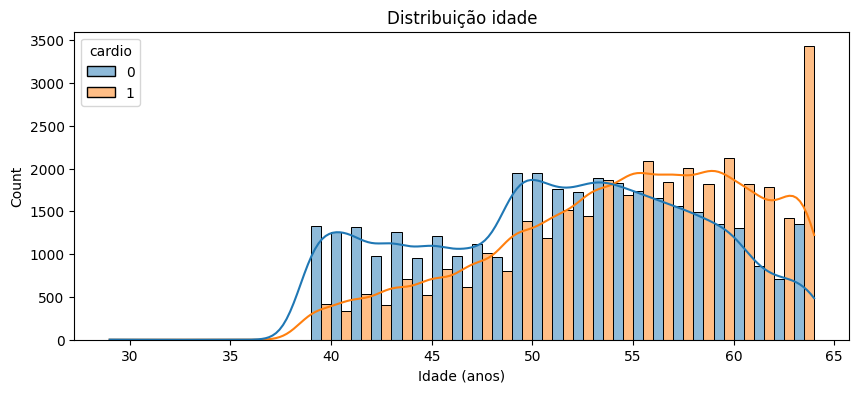

In [14]:
plt.figure(figsize=(10,4))
sns.histplot(x='age',hue='cardio',data=data, binwidth=1, kde=True, multiple='dodge')
plt.title('Distribuição idade')
plt.xlabel('Idade (anos)')
plt.show()

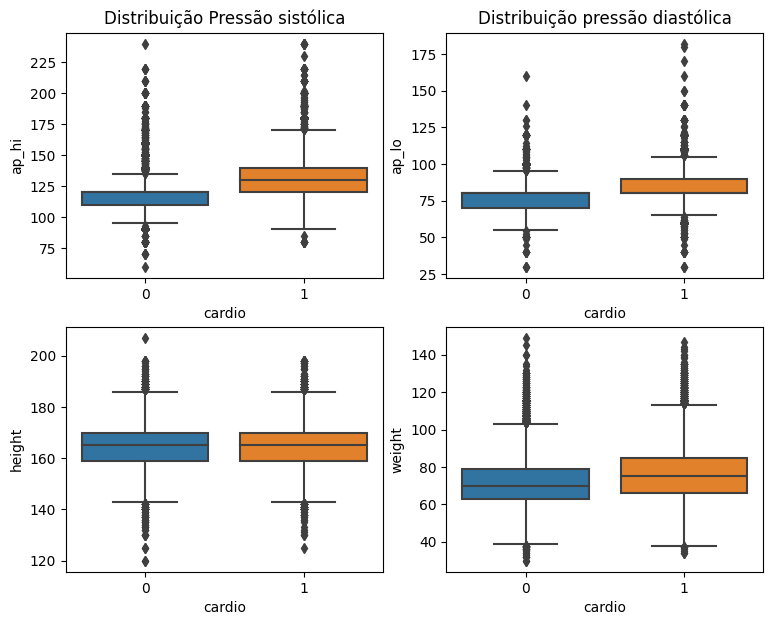

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9,7))
#boxplot
p1 = sns.boxplot(x='cardio', y='ap_hi', data=data, ax=axes[0,0])
p1.set_title('Distribuição Pressão sistólica')

p2 = sns.boxplot(x='cardio', y='ap_lo', data=data, ax=axes[0,1])
p2.set_title('Distribuição pressão diastólica')

p3 = sns.boxplot(x='cardio', y='height', data=data, ax=axes[1,0])

p4 = sns.boxplot(x='cardio', y='weight', data=data, ax=axes[1,1])



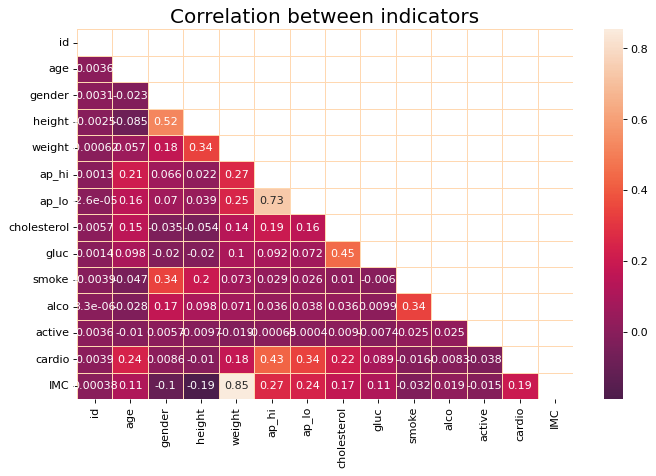

In [16]:
plt.figure(figsize=(10,6), dpi= 80)
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), mask=matrix, xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='rocket',
             center=0.2, linewidths=0.5, linecolor='#ffd8b1', annot=True)

plt.title('Correlation between indicators', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()